In [1]:
import sys
import os
import math
import matplotlib.pyplot as plt
from astropy.wcs import WCS
sys.path.append(os.path.abspath(os.path.join('..')))
os.chdir('..')
from data.DataObject import DataObject
from data.Region import Region

### Instantiate classes

In [2]:
do = DataObject()
rg = Region()

In [3]:
atomic_data_hdu = do.get_atomic_map_hdu()
atomic_data_wcs = do.get_atomic_map_wcs()

co_data_hdu = do.get_co_map_hdu()
co_data_wcs = do.get_co_map_wcs()

#### Conversion factor

In [4]:
conv = (1.82*10**18 * math.cos(55.1*3.14 / 180)) # Km s^-1 to cm^-2

converted_atomic_hdu = conv * atomic_data_hdu.data

#### Stars inside ACA region

In [5]:
rsgs_inside_aca_region = rg.star_coords_inside_aca_region(co_data_wcs, 'RSGs')
atomic_gas_inside_region = rg.draw_gas_map_inside_sky_region(co_data_wcs)

star_coords before <SkyCoord (ICRS): (ra, dec) in deg
    [(22.45804167, 31.32338889), (22.46175   , 30.75291667),
     (22.463375  , 30.77594444), ..., (24.488125  , 31.38469444),
     (24.48820833, 31.21494444), (24.49091667, 30.76902778)]>
star_coords after <SkyCoord (ICRS): (ra, dec) in deg
    [(22.45804167, 31.32338889), (22.46175   , 30.75291667),
     (22.463375  , 30.77594444), ..., (24.488125  , 31.38469444),
     (24.48820833, 31.21494444), (24.49091667, 30.76902778)]>


C:\Users\jerwa\AppData\Local\Temp\ipykernel_10216\453703337.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(['0','0.5','1','1.5', '2.0', '2.5', '3.0'])
C:\Users\jerwa\AppData\Local\Temp\ipykernel_10216\453703337.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(rsgs_inside_aca_region.ra.deg, rsgs_inside_aca_region.dec.deg, transform=ax.get_transform('fk5'), s=3, edgecolor='firebrick', facecolor='firebrick', cmap='gray')
C:\Users\jerwa\AppData\Local\Temp\ipykernel_10216\453703337.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


(550.0, 1070.0)

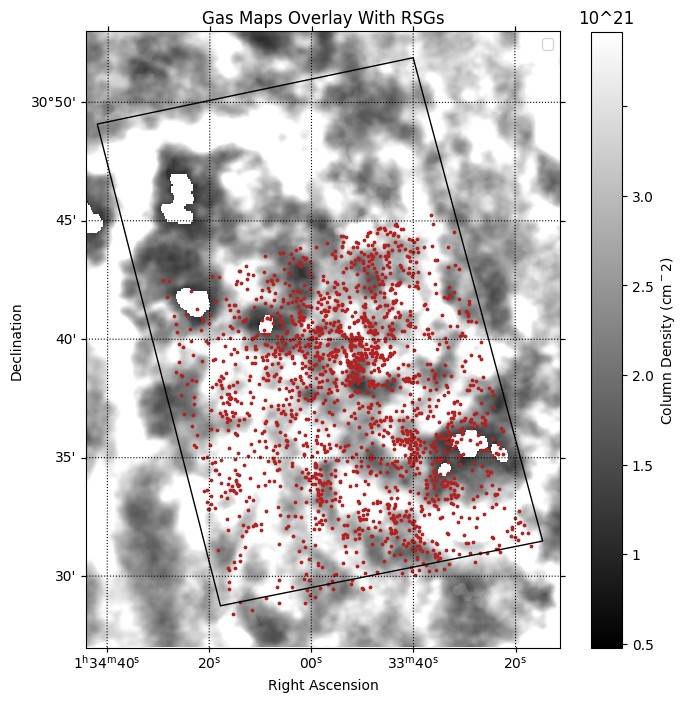

In [6]:
fig = plt.figure(figsize = (8, 8))
ax = plt.subplot(projection=atomic_data_wcs, label='overlays')

plt.imshow(converted_atomic_hdu, cmap='gray',  vmin=-100 * conv, vmax= 560 * conv)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(['0','0.5','1','1.5', '2.0', '2.5', '3.0'])
cbar.set_label('Column Density (cm$^-2$)', rotation=90)
cbar.ax.set_title('10^21')
plt.title('Gas Maps Overlay With RSGs')

ax.coords.grid(True, color='black', ls='dotted')
ax.coords[0].set_axislabel('Right Ascension')
ax.coords[1].set_axislabel('Declination')
#stars
ax.scatter(rsgs_inside_aca_region.ra.deg, rsgs_inside_aca_region.dec.deg, transform=ax.get_transform('fk5'), s=3, edgecolor='firebrick', facecolor='firebrick', cmap='gray')
atomic_gas_inside_region.plot()
location = 0 # For the best location
legend_drawn_flag = True
plt.legend()
ax.set_xlim(400,800)   
ax.set_ylim(550,1070)
# ax.contour(rg.get_co_map_data(), transform=ax.get_transform(WCS(rg.get_co_map_header, naxis=2)), colors='slateblue')

In [7]:
rsgs_inside_aca_region

<SkyCoord (ICRS): (ra, dec) in deg
    [(23.32075   , 30.52108333), (23.32275   , 30.53022222),
     (23.32604167, 30.53588889), ..., (23.6165    , 30.70763889),
     (23.61845833, 30.69625   ), (23.621625  , 30.70816667)]>